# Machine Learning models on Mismatch Response data

In this notebook: 
- Necessary imports
- SVM model 
- Logistic Regression model
- Decision Tree model

## Imports

In [3]:
import os       # using operating system dependent functionality (folders)
import pandas as pd # data analysis and manipulation
import numpy as np    # numerical computing (manipulating and performing operations on arrays of data)
import copy     # Can Copy and Deepcopy files so original file is untouched.
import seaborn as sn
import matplotlib.pyplot as plt

import sys
sys.path.insert(0, '../eegyolk') # path to helper functions
import helper_functions as hf # library useful for eeg and erp data cleaning
import epod_helper

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold 

In [4]:
df = pd.read_csv('df_avg_mmr.csv', sep = ',')
df.head()

,Group_AccToParents,mean_O1,mean_O2,mean_Oz,mean_PO3,mean_PO4,mean_Pz,kurt_O1,kurt_O2,kurt_Oz,...,var_O1,var_O2,var_Oz,var_PO3,var_PO4,var_Pz,ParticipantID,test,sex,age_months
0,1,-4.803768,-6.861465,-5.568198,-5.941640,-9.107199,-4.611721,-0.562165,-0.496082,-0.515277,...,11.654309,16.214139,12.996221,17.392739,27.598650,8.325084,101,a,1,20
1,1,19.883446,24.975000,15.546797,10.583465,9.278510,8.980769,-0.639914,-1.046457,-0.910234,...,524.818704,637.307599,101.583147,60.084244,47.493699,55.455804,103,a,0,20
2,1,5.025056,3.728181,4.172964,3.445599,2.649602,-1.490597,-0.188521,-0.654150,-0.162730,...,13.807001,10.307765,11.332309,9.173715,8.579250,6.555693,104,a,1,18
3,1,5.828814,2.111776,2.843554,2.561561,0.504324,2.682689,-0.444278,0.701477,0.745639,...,19.534927,15.763302,11.321726,10.939385,10.350494,5.764790,105,a,0,17
4,1,-2.111612,-2.724727,-1.171973,-1.092150,-2.354315,0.664995,0.525556,-0.330947,-0.641247,...,12.981522,14.795859,14.091485,15.670253,14.013175,5.508222,106,a,1,19


In [5]:
dfcor = df.corr()

In [6]:
dfcor

,Group_AccToParents,mean_O1,mean_O2,mean_Oz,mean_PO3,mean_PO4,mean_Pz,kurt_O1,kurt_O2,kurt_Oz,...,std_Pz,var_O1,var_O2,var_Oz,var_PO3,var_PO4,var_Pz,ParticipantID,sex,age_months
Group_AccToParents,1.000000,0.048711,0.091982,0.065978,0.058814,0.056248,0.082593,0.011299,0.007711,0.107210,...,0.170764,0.123721,0.088915,0.172935,0.193345,0.068883,0.183298,-0.230919,-0.070251,0.076087
mean_O1,0.048711,1.000000,0.789573,0.893965,0.834003,0.683421,0.613227,0.082998,-0.041289,0.045864,...,0.368500,0.403065,0.448722,-0.048353,-0.086224,0.094019,0.425718,-0.057620,-0.033457,0.322184
mean_O2,0.091982,0.789573,1.000000,0.821537,0.616530,0.783621,0.607216,-0.073885,-0.021485,0.019738,...,0.375120,0.501353,0.537324,0.110623,0.089165,0.076487,0.468673,-0.125636,-0.037437,0.254684
mean_Oz,0.065978,0.893965,0.821537,1.000000,0.806343,0.738403,0.618538,0.071705,-0.039772,0.035383,...,0.285566,0.308533,0.351224,-0.160735,-0.129720,-0.065965,0.344675,-0.022506,-0.012641,0.357766
mean_PO3,0.058814,0.834003,0.616530,0.806343,1.000000,0.612952,0.664337,0.128128,-0.027448,0.030562,...,0.212553,0.204877,0.259963,-0.115306,-0.286716,-0.033930,0.254187,0.061188,-0.007341,0.265882
mean_PO4,0.056248,0.683421,0.783621,0.738403,0.612952,1.000000,0.610465,-0.167578,-0.019904,0.029634,...,0.219184,0.235325,0.252421,-0.071519,0.019823,-0.102038,0.248634,-0.086755,-0.005540,0.219950
mean_Pz,0.082593,0.613227,0.607216,0.618538,0.664337,0.610465,1.000000,-0.046193,-0.023530,0.064729,...,0.276175,0.314958,0.351293,0.078603,0.042849,0.031500,0.336905,0.014565,-0.005010,0.149832
kurt_O1,0.011299,0.082998,-0.073885,0.071705,0.128128,-0.167578,-0.046193,1.000000,0.580867,0.601105,...,-0.103164,-0.070170,-0.029441,-0.126773,-0.179831,-0.018999,-0.068883,-0.023371,0.063909,0.156372
kurt_O2,0.007711,-0.041289,-0.021485,-0.039772,-0.027448,-0.019904,-0.023530,0.580867,1.000000,0.662847,...,-0.115112,-0.150350,-0.147411,-0.227254,-0.114925,-0.277210,-0.115727,-0.152906,0.038867,0.103960
kurt_Oz,0.107210,0.045864,0.019738,0.035383,0.030562,0.029634,0.064729,0.601105,0.662847,1.000000,...,-0.079787,-0.097052,-0.060000,-0.113780,-0.050686,-0.051328,-0.056300,-0.114281,0.028938,0.153641


In [7]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(dfcor, 50))

Top Absolute Correlations
std_PO4   var_PO4     0.998571
std_Oz    var_Oz      0.997267
var_O1    var_O2      0.994529
std_Pz    var_Pz      0.992272
std_PO3   var_PO3     0.989768
std_O1    std_O2      0.985909
          var_O1      0.981369
max_O1    max_Oz      0.979843
mean_O1   mean_Oz     0.979266
std_O2    var_O1      0.978348
          var_O2      0.975396
max_Oz    max_PO3     0.972959
kurt_PO3  kurt_Pz     0.963858
max_O1    max_O2      0.963399
std_O1    var_O2      0.962736
mean_Oz   mean_PO3    0.962677
max_O1    max_PO3     0.958016
min_Oz    min_PO4     0.957138
std_O1    var_Pz      0.953466
max_O2    var_O2      0.951874
std_Oz    var_PO4     0.950390
          std_PO3     0.949887
min_Oz    min_PO3     0.949743
max_O2    max_Oz      0.948617
std_PO3   var_Oz      0.948605
max_PO3   max_Pz      0.947876
min_O1    min_O2      0.947675
std_Oz    std_PO4     0.947514
var_O1    var_Pz      0.947150
std_O2    var_Pz      0.946632
mean_O1   mean_O2     0.946565
          mea

## Split data

In [91]:
y = df['Group_AccToParents'].values # dependent variable
X = df.drop(['Group_AccToParents','ParticipantID', 'test',
       'sex', 'age_months','kurt_O1', 'kurt_O2', 'kurt_Oz', 'kurt_PO3', 'kurt_PO4', 'kurt_Pz','kurt_O1', 'kurt_O2', 'kurt_Oz', 'kurt_PO3', 'kurt_PO4', 'kurt_Pz','skew_O2', 'skew_Oz', 'skew_PO3', 'skew_PO4', 'skew_Pz', 'std_O1',
       'std_O2', 'std_Oz', 'std_PO3', 'std_PO4', 'std_Pz', 'var_O1', 'var_O2',
       'var_Oz', 'var_PO3', 'var_PO4', 'var_Pz', 'min_O1',
       'min_O2', 'min_Oz', 'min_PO3', 'min_PO4', 'min_Pz', 'skew_O1','mean_O1', 'mean_O2', 'mean_Oz', 'mean_PO3', 'mean_PO4', 'mean_Pz',], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [92]:
X.columns

Index(['max_O1', 'max_O2', 'max_Oz', 'max_PO3', 'max_PO4', 'max_Pz'], dtype='object')

## Scale data

In [93]:
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

## SVM model

In [94]:
svm = SVC()
parameters = {'kernel':('linear', 'rbf'), 'C':[0.001, 1]}
clf = GridSearchCV(svm, parameters)
clf.fit(X_train, y_train)

sorted(clf.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_C',
 'param_kernel',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [95]:
clf.best_params_

{'C': 0.001, 'kernel': 'linear'}

In [96]:
clf.score(X_train, y_train)

0.5333333333333333

In [97]:
svm = SVC(C=1, kernel='linear', random_state=False)
svm.fit(X_train, y_train)

SVC(C=1, kernel='linear', random_state=False)

In [98]:
y_pred = svm.predict(X_test)
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.463


In [99]:
y_pred

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

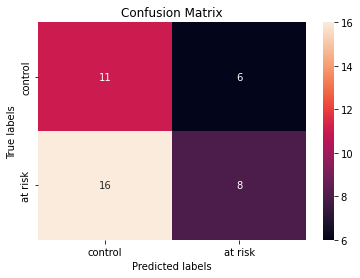

In [100]:
cm = confusion_matrix(y_test, y_pred)
ax= plt.subplot()
sn.heatmap(cm, annot=True, fmt='g', ax=ax);  
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['control', 'at risk']); ax.yaxis.set_ticklabels(['control', 'at risk']);

In [101]:
# with kfold cross validation
k = 6
kf = KFold(n_splits=k, shuffle=True, random_state=None)
model = svm
 
acc_score = []
 
for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]
     
    model.fit(X_train,y_train)
    pred_values = model.predict(X_test)
     
    acc = accuracy_score(pred_values , y_test)
    acc_score.append(acc)
     
avg_acc_score = sum(acc_score)/k
 
print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))

accuracy of each fold - [0.4117647058823529, 0.4117647058823529, 0.47058823529411764, 0.4117647058823529, 0.4117647058823529, 0.375]
Avg accuracy : 0.41544117647058815


## Logistic Regression model

In [102]:
lr = LogisticRegression(solver='liblinear', random_state=0)
lr.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [103]:
y_pred = lr.predict(X_test)

In [104]:
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.438


In [105]:
y_pred

array([0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1])

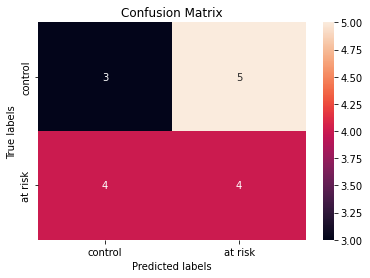

In [106]:
cm = confusion_matrix(y_test, y_pred)
ax= plt.subplot()
sn.heatmap(cm, annot=True, fmt='g', ax=ax);  
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['control', 'at risk']); ax.yaxis.set_ticklabels(['control', 'at risk']);

In [107]:
# with kfold cross validation
k = 6
kf = KFold(n_splits=k, shuffle = True, random_state=None)
model = lr
 
acc_score = []
 
for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]
     
    model.fit(X_train,y_train)
    pred_values = model.predict(X_test)
     
    acc = accuracy_score(pred_values , y_test)
    acc_score.append(acc)
     
avg_acc_score = sum(acc_score)/k
 
print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))

accuracy of each fold - [0.47058823529411764, 0.29411764705882354, 0.5294117647058824, 0.47058823529411764, 0.35294117647058826, 0.625]
Avg accuracy : 0.4571078431372549


## Decision Tree model

In [108]:
dt = tree.DecisionTreeClassifier(max_depth=5)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [109]:
y_pred = dt.predict(X_test)

In [110]:
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.312


In [111]:
y_pred

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1])

[Text(0.5921052631578947, 0.9166666666666666, 'X[5] <= 7.43\ngini = 0.494\nsamples = 85\nvalue = [38, 47]'),
 Text(0.34210526315789475, 0.75, 'X[3] <= 3.803\ngini = 0.499\nsamples = 63\nvalue = [33, 30]'),
 Text(0.21052631578947367, 0.5833333333333334, 'X[0] <= 3.021\ngini = 0.401\nsamples = 18\nvalue = [5, 13]'),
 Text(0.10526315789473684, 0.4166666666666667, 'X[4] <= 2.391\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.05263157894736842, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.15789473684210525, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.3157894736842105, 0.4166666666666667, 'X[4] <= 2.19\ngini = 0.245\nsamples = 14\nvalue = [2, 12]'),
 Text(0.2631578947368421, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.3684210526315789, 0.25, 'X[4] <= 3.085\ngini = 0.142\nsamples = 13\nvalue = [1, 12]'),
 Text(0.3157894736842105, 0.08333333333333333, 'gini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.42105263157894735, 0.08333333333333333, 'g

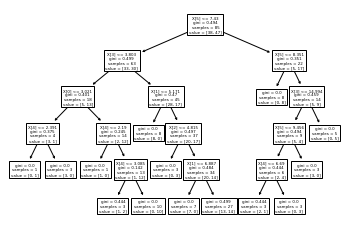

In [112]:
tree.plot_tree(dt)

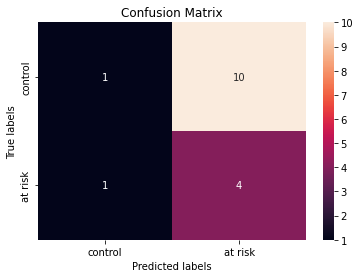

In [113]:
cm = confusion_matrix(y_test, y_pred)
ax= plt.subplot()
sn.heatmap(cm, annot=True, fmt='g', ax=ax);  
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['control', 'at risk']); ax.yaxis.set_ticklabels(['control', 'at risk']);

In [114]:
# with kfold cross validation
k = 6
kf = KFold(n_splits=k, shuffle=True, random_state=None)
model = tree.DecisionTreeClassifier(max_depth=5)
 
acc_score = []
 
for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]
     
    model.fit(X_train,y_train)
    pred_values = model.predict(X_test)
     
    acc = accuracy_score(pred_values , y_test)
    acc_score.append(acc)
     
avg_acc_score = sum(acc_score)/k
 
print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))

accuracy of each fold - [0.6470588235294118, 0.5882352941176471, 0.5294117647058824, 0.47058823529411764, 0.35294117647058826, 0.4375]
Avg accuracy : 0.5042892156862745
